In [28]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

sns.set()

In [29]:
df = pd.read_csv('admission.csv')

In [30]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [31]:
### a) 10 random rows

df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
356,357,327,109,3,3.5,4.0,8.77,1,0.79
490,491,307,105,2,2.5,4.5,8.12,1,0.67
309,310,308,110,4,3.5,3.0,8.60,0,0.70
86,87,315,106,3,4.5,3.5,8.42,0,0.72
469,470,326,114,4,4.0,3.5,9.16,1,0.86
107,108,338,117,4,3.5,4.5,9.46,1,0.91
136,137,312,103,3,5.0,4.0,8.45,0,0.76
364,365,313,102,3,3.5,4.0,8.90,1,0.77
326,327,299,100,3,2.0,2.0,8.02,0,0.63
466,467,314,99,4,3.5,4.5,8.73,1,0.71


In [32]:
### b) description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [33]:
### c) shape of dataset

df.shape

(500, 9)

In [34]:
### d) Generate the correlation matrix

matrix= df.corr()
print(matrix)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Chance of Admit      0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.137352 -0.003694 -0.074289 -0.005332          0.008505  
GRE Score          0.613498  0.524679  0.825878  0.563398          0.810351  
TOEFL

<Axes: >

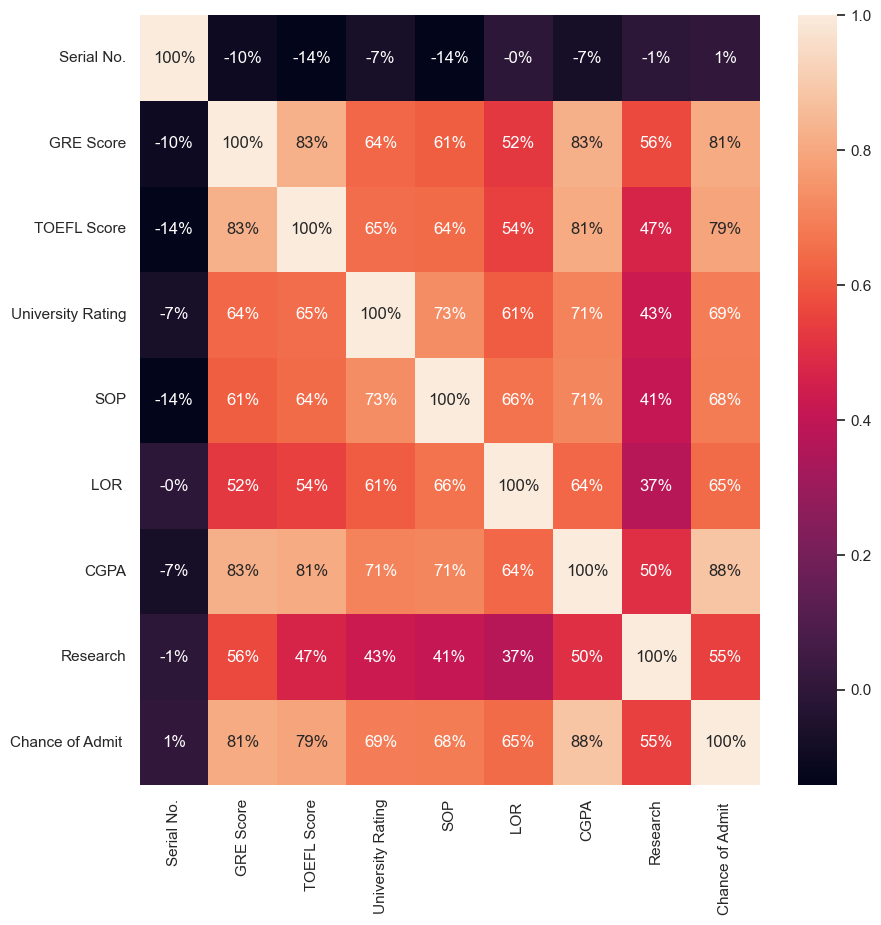

In [35]:
### e) Generate a correlogram

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt = '.0%')

### Q.2 Find out the minimum and maximum values for GRE score


In [36]:
df["GRE Score"].min()

290

In [37]:
df["GRE Score"].max()

340

### Q.3 Find out the percentage of universities for each university rating

([<matplotlib.patches.Wedge at 0x15b3857be20>,
 [Text(0.5776920901528353, 0.936093931704959, '3'),
  Text(-1.0461621742897658, 0.3399186742226879, '2'),
  Text(-0.4620942904114756, -0.9982328720138979, '4'),
  Text(0.6958271640656856, -0.8519533776846627, '5'),
  Text(1.074994933217536, -0.23320783339464807, '1')],
 [Text(0.315104776447001, 0.5105966900208867, '32.4%\n162'),
  Text(-0.5706339132489631, 0.18541018593964795, '25.2%\n126'),
  Text(-0.2520514311335321, -0.544490657462126, '21.0%\n105'),
  Text(0.3795420894903739, -0.46470184237345236, '14.6%\n73'),
  Text(0.5863608726641104, -0.1272042727607171, '6.8%\n34')])

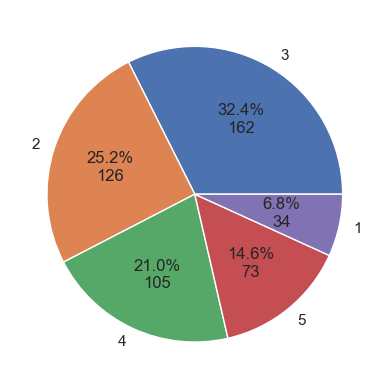

In [38]:
perc = df['University Rating'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, perc*x/100)
plt.pie(df['University Rating'].value_counts().values, labels=df['University Rating'].value_counts().index, autopct=fmt)

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [39]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [40]:
df["Chance of Admit "]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [41]:
df.loc[df['Chance of Admit '] <= 0.8, 'Chance of Admit '] = 0
df.loc[df['Chance of Admit '] > 0.8, 'Chance of Admit '] = 1

In [42]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [43]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [46]:
x=df.drop(['Chance of Admit '],axis=1)

In [47]:
y=df['Chance of Admit '].values

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [49]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
print("Decision Tree Classifier : {:.2f}%".format(dtc.score(x_test,y_test)*100))

Decision Tree Classifier : 92.00%


In [51]:
predictions=dtc.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
conf_matrix=confusion_matrix(y_test,predictions)

In [54]:
print(conf_matrix)

[[108   7]
 [  5  30]]


<Axes: >

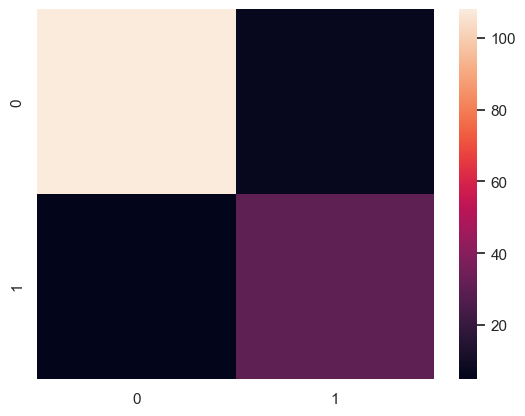

In [55]:
sns.heatmap(conf_matrix)

##### Decision Tree Classifier(Hyper parameter tuning)

In [56]:
dtc1=DecisionTreeClassifier(max_depth=4)

In [57]:
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [58]:
print("Decision Tree Classifier with max depth 4 : {:.2f}%".format(dtc1.score(x_test,y_test)*100))

Decision Tree Classifier with max depth 4 : 92.67%


In [59]:
predictions2=dtc1.predict(x_test)

In [60]:
conf_matrix2=confusion_matrix(y_test,predictions2)

In [61]:
print(conf_matrix2)

[[109   6]
 [  5  30]]


In [62]:
print(dtc1.score(x_train, y_train))
print(dtc1.score(x_test,y_test))

0.9571428571428572
0.9266666666666666
